# 2. Supervised Learning
## 2.3 Supervised Machine Learning Algorithms

In [12]:
from IPython.display import display
import mglearn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_boston
%matplotlib inline

## 2.3.1 Some Sample Datasets

### forge(거짓의, 허위의) 데이터셋
  - 이진 분류 데이터셋
  - classification용

In [4]:
X, y = mglearn.datasets.make_forge()
print(X)
print(len(X))
print(type(X))
print(X.shape)

[[  9.96346605   4.59676542]
 [ 11.0329545   -0.16816717]
 [ 11.54155807   5.21116083]
 [  8.69289001   1.54322016]
 [  8.1062269    4.28695977]
 [  8.30988863   4.80623966]
 [ 11.93027136   4.64866327]
 [  9.67284681  -0.20283165]
 [  8.34810316   5.13415623]
 [  8.67494727   4.47573059]
 [  9.17748385   5.09283177]
 [ 10.24028948   2.45544401]
 [  8.68937095   1.48709629]
 [  8.92229526  -0.63993225]
 [  9.49123469   4.33224792]
 [  9.25694192   5.13284858]
 [  7.99815287   4.8525051 ]
 [  8.18378052   1.29564214]
 [  8.7337095    2.49162431]
 [  9.32298256   5.09840649]
 [ 10.06393839   0.99078055]
 [  9.50048972  -0.26430318]
 [  8.34468785   1.63824349]
 [  9.50169345   1.93824624]
 [  9.15072323   5.49832246]
 [ 11.563957     1.3389402 ]]
26
<class 'numpy.ndarray'>
(26, 2)


In [5]:
print(y)
print(len(y))
print(type(y))
print(y.shape)

[1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0]
26
<class 'numpy.ndarray'>
(26,)


In [9]:
print(X[:, 0])
print(len(X[:, 0]))

[  9.96346605  11.0329545   11.54155807   8.69289001   8.1062269
   8.30988863  11.93027136   9.67284681   8.34810316   8.67494727
   9.17748385  10.24028948   8.68937095   8.92229526   9.49123469
   9.25694192   7.99815287   8.18378052   8.7337095    9.32298256
  10.06393839   9.50048972   8.34468785   9.50169345   9.15072323
  11.563957  ]
26


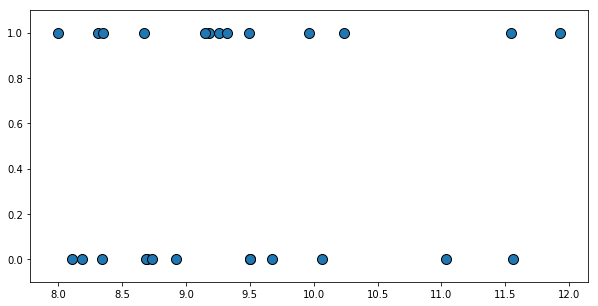

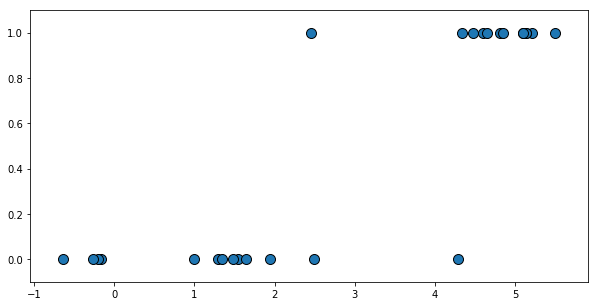

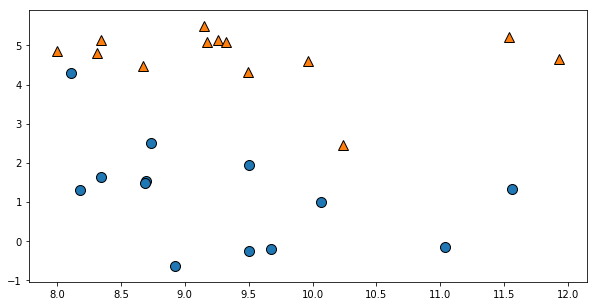

In [13]:
plt.figure(figsize=(10, 5))
mglearn.discrete_scatter(X[:, 0], y)
plt.figure(figsize=(10, 5))
mglearn.discrete_scatter(X[:, 1], y)
plt.figure(figsize=(10, 5))
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

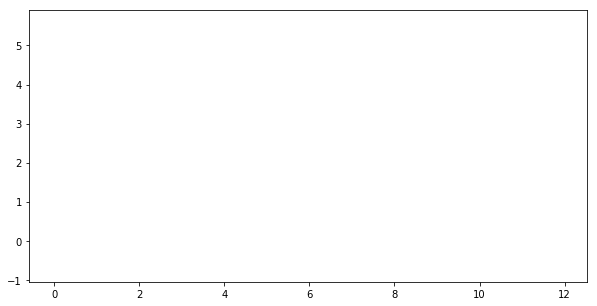

In [18]:
tmp_x = np.linspace(10, 20, 26)
tmp_x
plt.figure(figsize=(10, 5))
mglearn.discrete_scatter(X[:, 0], X[:, 1], tmp_x, y)

- 하나의 변수와 y와의 관계를 표현하는 그래프도 이상하고, 세 개의 변수와 y와의 관계를 표현하는 그래프도 이상하다.
- mglearn.discrete_scatter()메서드는 오직 두 변수와 y간의 관계에 대해서만 표현이 가능한 것으로 보임
- mglearn.discrete_scatter(x1, x2, y=None, markers=None, s=10, ax=None, labels=None, padding=0.2, alpha=1, c=None, markeredgewidth=None)

<pre>
x1 : nd-array
    input data, first axis

x2 : nd-array
    input data, second axis

y : nd-array
    input data, discrete labels
    
</pre>



X.shape: (26, 2)
X:
[[  9.96346605   4.59676542]
 [ 11.0329545   -0.16816717]
 [ 11.54155807   5.21116083]
 [  8.69289001   1.54322016]
 [  8.1062269    4.28695977]
 [  8.30988863   4.80623966]
 [ 11.93027136   4.64866327]
 [  9.67284681  -0.20283165]
 [  8.34810316   5.13415623]
 [  8.67494727   4.47573059]
 [  9.17748385   5.09283177]
 [ 10.24028948   2.45544401]
 [  8.68937095   1.48709629]
 [  8.92229526  -0.63993225]
 [  9.49123469   4.33224792]
 [  9.25694192   5.13284858]
 [  7.99815287   4.8525051 ]
 [  8.18378052   1.29564214]
 [  8.7337095    2.49162431]
 [  9.32298256   5.09840649]
 [ 10.06393839   0.99078055]
 [  9.50048972  -0.26430318]
 [  8.34468785   1.63824349]
 [  9.50169345   1.93824624]
 [  9.15072323   5.49832246]
 [ 11.563957     1.3389402 ]]
y.shape: (26,)
y:
[1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0]


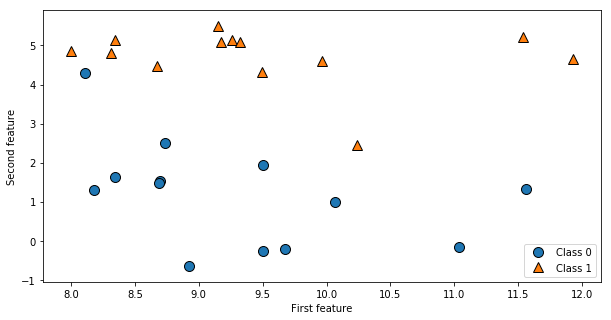

In [2]:
# generate dataset
X, y = mglearn.datasets.make_forge()
print("X.shape: {}".format(X.shape))
print("X:\n{}".format(X))
print("y.shape: {}".format(y.shape))
print("y:\n{}".format(y))

# plot dataset
plt.figure(figsize=(10, 5))
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()

- make_forge()를 이용하여 인위적으로 이진 분류 데이터셋을 만들었다.
- 두 클래스가 각각 다른 색상으로 표현되어 있다.
- 첫 번째 feature와 두 번째 feature에 대한 관계를 표현한다.

### wave 데이터셋
- regression 용

X.shape: (404, 1)
X:
[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]
 [-2.06403288]
 [-2.65149833]
 [ 2.19705687]
 [ 0.60669007]
 [ 1.24843547]
 [-2.87649303]
 [ 2.81945911]
 [ 1.99465584]
 [-1.72596534]
 [-1.9090502 ]
 [-1.89957294]
 [-1.17454654]
 [ 0.14853859]
 [-0.40832989]
 [-1.25262516]
 [ 0.67111737]
 [-2.16303684]
 [-1.24713211]
 [-0.80182894]
 [-0.26358009]
 [ 1.71105577]
 [-1.80195731]
 [ 0.08540663]
 [ 0.55448741]
 [-2.72129752]
 [ 0.64526911]
 [-1.97685526]
 [-2.60969044]
 [ 2.69331322]
 [ 2.7937922 ]
 [ 1.85038409]
 [-1.17231738]
 [-2.41396732]
 [ 1.10539816]
 [-0.35908504]
 [-2.26777059]
 [-0.02893854]
 [-2.79366887]
 [ 2.45592241]
 [-1.44732011]
 [ 0.97513371]
 [-1.12973354]
 [ 0.12040813]
 [ 0.28026168]
 [-1.89087327]
 [ 2.81750777]
 [ 1.65079694]
 [ 2.63699365]
 [ 2.3689641 ]
 [ 0.58739987]
 [ 2.53124541]
 [-2.46904499]
 [-1.82410283]
 [-2.72863627]
 [-1.04801802]
 [-0.66793626]
 [-1.37190581]
 [ 1.97242505]
 [-0.85948004]
 [-1.31439294]
 [ 0

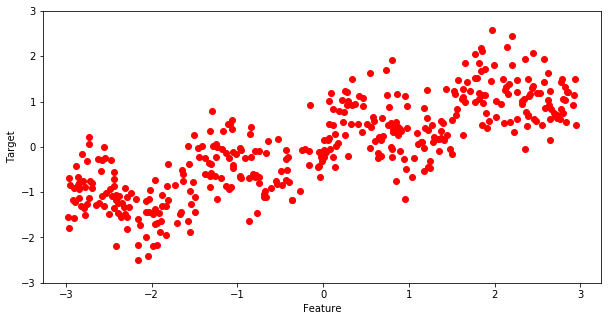

In [24]:
X, y = mglearn.datasets.make_wave(n_samples=404)
print("X.shape: {}".format(X.shape))
print("X:\n{}".format(X))
print("y.shape: {}".format(y.shape))
print("y:\n{}".format(y))

plt.figure(figsize=(10, 5))
plt.plot(X, y, 'o', color='r')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")
plt.show()

### Wisconsin Breast Cancer(유방암) 데이터셋
- classification용

In [25]:
# from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys(): {}".format(cancer.keys()))

cancer.keys(): dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [27]:
print(cancer.data)
print(type(cancer.data))
print(cancer.data.shape)

[[  1.79900000e+01   1.03800000e+01   1.22800000e+02 ...,   2.65400000e-01
    4.60100000e-01   1.18900000e-01]
 [  2.05700000e+01   1.77700000e+01   1.32900000e+02 ...,   1.86000000e-01
    2.75000000e-01   8.90200000e-02]
 [  1.96900000e+01   2.12500000e+01   1.30000000e+02 ...,   2.43000000e-01
    3.61300000e-01   8.75800000e-02]
 ..., 
 [  1.66000000e+01   2.80800000e+01   1.08300000e+02 ...,   1.41800000e-01
    2.21800000e-01   7.82000000e-02]
 [  2.06000000e+01   2.93300000e+01   1.40100000e+02 ...,   2.65000000e-01
    4.08700000e-01   1.24000000e-01]
 [  7.76000000e+00   2.45400000e+01   4.79200000e+01 ...,   0.00000000e+00
    2.87100000e-01   7.03900000e-02]]
<class 'numpy.ndarray'>
(569, 30)


In [28]:
print(cancer.target)
print(type(cancer.target))
print(cancer.target.shape)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [29]:
print(cancer.target_names) # malignant: 악성의

['malignant' 'benign']


In [30]:
cancer.target # 0,1로만 이루어진 라벨 데이터

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0,

In [31]:
cancer.target[0] == False

True

In [9]:
print("Sample counts per class:\n{}".format(
      {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}
)) # print(list(zip(['malignant', 'benign'], [212, 357])))

Sample counts per class:
{'malignant': 212, 'benign': 357}


#### np.bincount()
  - Count number of occurrences of each value in array of non-negative ints.
  - 즉, 0과 1로만 이루어진 array에서 대해서는 0이 아닌 값과 0인 값의 개수를 세어 반환한다.

In [38]:
tmp_w = np.array([0.3, 0.5, 0.2, 0.7, 1., -0.6, 0, 0.5]) # weights
tmp_x = np.array([0, 1, 1, 2, 2, 2, 3, 3])
np.bincount(tmp_x,  weights=tmp_w)

array([ 0.3,  0.7,  1.1,  0.5])

  - 위와 같은 경우는 라벨이 0인 경우의 합산 결과, 1인 경우의 합산 결과, 2인 경우의 합산 결과, 3인 경우의 합산 결과가 numpy.ndarray로 반환되는 것으로 보인다.

#### zip 예시

In [39]:
print(list(zip([1, 2, 3], [4, 5, 6])))
print(list(zip([1, 2, 3], [4, 5, 6], [7, 8, 9])))
print(list(zip("abc", "def")))

[(1, 4), (2, 5), (3, 6)]
[(1, 4, 7), (2, 5, 8), (3, 6, 9)]
[('a', 'd'), ('b', 'e'), ('c', 'f')]


In [40]:
np.bincount(cancer.target)

array([212, 357])

In [41]:
cancer.target_names

array(['malignant', 'benign'],
      dtype='<U9')

In [43]:
print(list(zip(['malignant', 'benign'], [212, 357])))

[('malignant', 212), ('benign', 357)]


In [37]:
print("Feature names:\n{}".format(cancer.feature_names)) # 30개의 feature

Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


### Boston Housing 데이터셋
- regression 용

In [44]:
# from sklearn.datasets import load_boston
boston = load_boston()
print("boston.keys(): {}".format(boston.keys()))

boston.keys(): dict_keys(['data', 'target', 'feature_names', 'DESCR'])


In [45]:
print(boston.data)
print(type(boston.data))
print(boston.data.shape)

[[  6.32000000e-03   1.80000000e+01   2.31000000e+00 ...,   1.53000000e+01
    3.96900000e+02   4.98000000e+00]
 [  2.73100000e-02   0.00000000e+00   7.07000000e+00 ...,   1.78000000e+01
    3.96900000e+02   9.14000000e+00]
 [  2.72900000e-02   0.00000000e+00   7.07000000e+00 ...,   1.78000000e+01
    3.92830000e+02   4.03000000e+00]
 ..., 
 [  6.07600000e-02   0.00000000e+00   1.19300000e+01 ...,   2.10000000e+01
    3.96900000e+02   5.64000000e+00]
 [  1.09590000e-01   0.00000000e+00   1.19300000e+01 ...,   2.10000000e+01
    3.93450000e+02   6.48000000e+00]
 [  4.74100000e-02   0.00000000e+00   1.19300000e+01 ...,   2.10000000e+01
    3.96900000e+02   7.88000000e+00]]
<class 'numpy.ndarray'>
(506, 13)


In [46]:
print(boston.target) # 회귀라고 판단 가능
print(type(boston.target))
print(boston.target.shape)

[ 24.   21.6  34.7  33.4  36.2  28.7  22.9  27.1  16.5  18.9  15.   18.9
  21.7  20.4  18.2  19.9  23.1  17.5  20.2  18.2  13.6  19.6  15.2  14.5
  15.6  13.9  16.6  14.8  18.4  21.   12.7  14.5  13.2  13.1  13.5  18.9
  20.   21.   24.7  30.8  34.9  26.6  25.3  24.7  21.2  19.3  20.   16.6
  14.4  19.4  19.7  20.5  25.   23.4  18.9  35.4  24.7  31.6  23.3  19.6
  18.7  16.   22.2  25.   33.   23.5  19.4  22.   17.4  20.9  24.2  21.7
  22.8  23.4  24.1  21.4  20.   20.8  21.2  20.3  28.   23.9  24.8  22.9
  23.9  26.6  22.5  22.2  23.6  28.7  22.6  22.   22.9  25.   20.6  28.4
  21.4  38.7  43.8  33.2  27.5  26.5  18.6  19.3  20.1  19.5  19.5  20.4
  19.8  19.4  21.7  22.8  18.8  18.7  18.5  18.3  21.2  19.2  20.4  19.3
  22.   20.3  20.5  17.3  18.8  21.4  15.7  16.2  18.   14.3  19.2  19.6
  23.   18.4  15.6  18.1  17.4  17.1  13.3  17.8  14.   14.4  13.4  15.6
  11.8  13.8  15.6  14.6  17.8  15.4  21.5  19.6  15.3  19.4  17.   15.6
  13.1  41.3  24.3  23.3  27.   50.   50.   50.   2

In [13]:
print("Feature Names: {}".format(boston.feature_names))
print("Feature Names: {}".format(boston.DESCR))

Feature Names: ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
Feature Names: Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highw

In [14]:
print("Data shape: {}".format(boston.data.shape))
print("Target shape: {}".format(boston.target.shape))

Data shape: (506, 13)
Target shape: (506,)


In [24]:
boston.feature_names # 13개의 feature

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'],
      dtype='<U7')

#### 특성 공학(feature engineering)
- mglearn.datasets.load_extended_boston()으로 구현
- 특성끼리 곱하여 의도적으로 특성을 확장시킴

<img src="../image/IMG_0465.jpg"></img>

In [50]:
X, y = mglearn.datasets.load_extended_boston()
print("X.shape: {}".format(X.shape)) 
print(type(X))
print()
# 13 -> 13+91 = 104, feature 개수 늘어남. feature개수가 늘어나면 더 좋은지는 알 수 없음
print("y.shape: {}".format(y.shape))

X.shape: (506, 104)
<class 'numpy.ndarray'>

y.shape: (506,)


In [27]:
X

array([[  0.00000000e+00,   1.80000000e-01,   6.78152493e-02, ...,
          1.00000000e+00,   8.96799117e-02,   8.04248656e-03],
       [  2.35922539e-04,   0.00000000e+00,   2.42302053e-01, ...,
          1.00000000e+00,   2.04470199e-01,   4.18080621e-02],
       [  2.35697744e-04,   0.00000000e+00,   2.42302053e-01, ...,
          9.79579831e-01,   6.28144504e-02,   4.02790570e-03],
       ..., 
       [  6.11892474e-04,   0.00000000e+00,   4.20454545e-01, ...,
          1.00000000e+00,   1.07891832e-01,   1.16406475e-02],
       [  1.16072990e-03,   0.00000000e+00,   4.20454545e-01, ...,
          9.82676920e-01,   1.29930407e-01,   1.71795127e-02],
       [  4.61841693e-04,   0.00000000e+00,   4.20454545e-01, ...,
          1.00000000e+00,   1.69701987e-01,   2.87987643e-02]])

In [30]:
y

array([ 24. ,  21.6,  34.7,  33.4,  36.2,  28.7,  22.9,  27.1,  16.5,
        18.9,  15. ,  18.9,  21.7,  20.4,  18.2,  19.9,  23.1,  17.5,
        20.2,  18.2,  13.6,  19.6,  15.2,  14.5,  15.6,  13.9,  16.6,
        14.8,  18.4,  21. ,  12.7,  14.5,  13.2,  13.1,  13.5,  18.9,
        20. ,  21. ,  24.7,  30.8,  34.9,  26.6,  25.3,  24.7,  21.2,
        19.3,  20. ,  16.6,  14.4,  19.4,  19.7,  20.5,  25. ,  23.4,
        18.9,  35.4,  24.7,  31.6,  23.3,  19.6,  18.7,  16. ,  22.2,
        25. ,  33. ,  23.5,  19.4,  22. ,  17.4,  20.9,  24.2,  21.7,
        22.8,  23.4,  24.1,  21.4,  20. ,  20.8,  21.2,  20.3,  28. ,
        23.9,  24.8,  22.9,  23.9,  26.6,  22.5,  22.2,  23.6,  28.7,
        22.6,  22. ,  22.9,  25. ,  20.6,  28.4,  21.4,  38.7,  43.8,
        33.2,  27.5,  26.5,  18.6,  19.3,  20.1,  19.5,  19.5,  20.4,
        19.8,  19.4,  21.7,  22.8,  18.8,  18.7,  18.5,  18.3,  21.2,
        19.2,  20.4,  19.3,  22. ,  20.3,  20.5,  17.3,  18.8,  21.4,
        15.7,  16.2,